## FLDA特征提取——最小距离分类器及其评分

## 一、特征提取

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import math

########## 1、获取数字化后的图像训练数据 ##########
f = open("faceR","r",encoding="utf8")
x = f.read()
f.close()
x = x.split() #默认删除所有空字符，包括空格和换行符等
x = np.array(list(float(char) for char in x)) #字符串列表转数组
x.resize((1996,100)) #转为二维数组
xtrain = x
print('图像训练数据xtrain:\n',xtrain,xtrain.shape)
xtrain = np.delete(xtrain,0,axis=1) #删除第一列：图片编号
print('\nxtrain去编号后：\n',xtrain,xtrain.shape)
#标准化图像训练数据
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
n_features = xtrain.shape[1]
n_samples = xtrain.shape[0]
print('\nxtrain标准化后：\n',xtrain,"\n特征数：",n_features,"\n样本数：",n_samples)


######### 2、获取预处理后的标签训练数据 ##########
f = open("faceDR","r",encoding="utf8")
y = f.read()
f.close()
y = y.split() #默认删除所有空字符，包括空格和换行符等
#print(y)
del y[0]
#print(y)
y = np.array(y)
y.resize((1996,5))
ytrain = y
for i in range(1996):
    if ytrain[i,2] == 'chil':
        ytrain[i,2] = 'child'
    elif ytrain[i,2] == 'adulte':
        ytrain[i,2] = 'adult'
    elif ytrain[i,3] == 'whit':
        ytrain[i,3] = 'white'
    elif ytrain[i,3] == 'whitee':
        ytrain[i,3] = 'white'
    elif ytrain[i,4] == 'erious':
        ytrain[i,4] = 'serious'
    elif ytrain[i,4] == 'smilin':
        ytrain[i,4] = 'smiling'
print('标签训练数据ytrain:\n',ytrain,ytrain.shape)

#性别分类
print('\n性别分类ytrain_sex:\n',ytrain[:,1],ytrain[:,1].shape)
#年龄分类
print('\n年龄分类ytrain_age:\n',ytrain[:,2],ytrain[:,2].shape)
#种族分类
print('\n种族分类ytrain_race:\n',ytrain[:,3],ytrain[:,3].shape)
#表情分类
print('\n表情分类ytrain_face:\n',ytrain[:,4],ytrain[:,4].shape)


########### 3、获取预处理后的测试数据 #########
f = open("faceS","r",encoding="utf8")
x2 = f.read()
f.close()
x2 = x2.split() #默认删除所有空字符，包括空格和换行符等
x2 = np.array(list(float(char) for char in x2)) #字符串列表转数组
x2.resize((1996,100)) #转为二维数组
xtest = x2
print('图像测试数据xtest:\n',xtest,xtest.shape)
xtest = np.delete(xtest,0,axis=1) #删除第一列：图片编号
print('\nxtest去编号后：\n',xtest,xtest.shape)
xtest = scaler.fit_transform(xtest)
print('\nxtest标准化后：\n',xtest)


########### 4、获取标签测试数据 ##########
f = open("faceDS","r",encoding="utf8")
y2 = f.read()
f.close()
y2 = y2.split() #默认删除所有空字符，包括空格和换行符等
#del y2[0]  #faceDS文件比faceDR文件少了第一个多余的字符串，所以不用del掉。建议此处先print测试一下
y2 = np.array(y2)
y2.resize((1996,5))
ytest = y2
print('标签测试数据ytest:\n',ytest,ytest.shape)
#性别分类
print('\n性别分类ytest_sex:\n',ytest[:,1],ytest[:,1].shape)
#年龄分类
print('\n年龄分类ytest_age:\n',ytest[:,2],ytest[:,2].shape)
#种族分类
print('\n种族分类ytest_race:\n',ytest[:,3],ytest[:,3].shape)
#表情分类
print('\n表情分类ytest_face:\n',ytest[:,4],ytest[:,4].shape)


########## 5、创建LDA模型降维并训练 ###########
##不同于PCA用于无监督学习的特征提取，FLDA适用于监督学习的特征提取，即需要标签y一起送入LDA模型中训练
#创建性别分类的LDA模型降维并训练
lda_sex = LDA(n_components=1) #监督学习下的FLDA特征提取，数据降维后的维数受特征维数和类别数的限制，不能超过（类别数-1）；PCA较自由
lda_sex.fit(xtrain,ytrain[:,1]) #最大不能超过2-1=1
#将训练好的LDA模型对数据进行特征提取
xtrain_sex = lda_sex.transform(xtrain)
xtest_sex = lda_sex.transform(xtest)
print('用训练后的性别分类LDA模型降维后的图像训练数据和测试数据：',xtrain_sex.shape,xtest_sex.shape)

#创建年龄分类的LDA模型降维并训练
lda_age = LDA(n_components=3) #最大不能超过4-1=3
lda_age.fit(xtrain,ytrain[:,2])
#将训练好的LDA模型对数据进行特征提取
xtrain_age = lda_age.transform(xtrain)
xtest_age = lda_age.transform(xtest)
print('用训练后的年龄分类LDA模型降维后的图像训练数据和测试数据：',xtrain_age.shape,xtest_age.shape)

#创建种族分类的LDA模型降维并训练
lda_race = LDA(n_components=4) #最大不能超过5-1=4
lda_race.fit(xtrain,ytrain[:,3])
#将训练好的LDA模型对数据进行特征提取
xtrain_race = lda_race.transform(xtrain)
xtest_race = lda_race.transform(xtest)
print('用训练后的种族分类LDA模型降维后的图像训练数据和测试数据：',xtrain_race.shape,xtest_race.shape)

#创建表情分类的LDA模型降维并训练
lda_face = LDA(n_components=2) #最大不能超过3-1=2
lda_face.fit(xtrain,ytrain[:,4])
#将训练好的LDA模型对数据进行特征提取
xtrain_face = lda_face.transform(xtrain)
xtest_face = lda_face.transform(xtest)
print('用训练后的表情分类LDA模型降维后的图像训练数据和测试数据：',xtrain_face.shape,xtest_face.shape)

图像训练数据xtrain:
 [[ 1.22300000e+03 -1.77961902e+03  2.10730127e+03 ... -8.61942370e+01
   1.28772320e+01  2.38823390e+01]
 [ 1.22400000e+03 -2.71997339e+03  2.97884375e+03 ... -4.68737700e+00
  -4.28034670e+01  1.19861970e+01]
 [ 1.22500000e+03 -9.46141785e+02 -1.17116028e+03 ...  6.00232730e+01
   2.21902800e+00  1.66275270e+01]
 ...
 [ 3.22000000e+03  1.07736768e+03 -6.24962646e+02 ...  3.08739870e+01
  -1.76446100e+00  6.32692180e+01]
 [ 3.22100000e+03  1.62751266e+02  1.92902429e+03 ...  1.28961792e+02
   5.91272430e+01 -5.73871399e+02]
 [ 3.22200000e+03 -6.97708984e+02 -2.36467910e+01 ... -9.68876270e+01
  -1.05578690e+02  1.03433350e+02]] (1996, 100)

xtrain去编号后：
 [[-1.77961902e+03  2.10730127e+03  8.07759949e+02 ... -8.61942370e+01
   1.28772320e+01  2.38823390e+01]
 [-2.71997339e+03  2.97884375e+03 -1.22765790e+01 ... -4.68737700e+00
  -4.28034670e+01  1.19861970e+01]
 [-9.46141785e+02 -1.17116028e+03  5.57305603e+02 ...  6.00232730e+01
   2.21902800e+00  1.66275270e+01]
 ...
 [ 

## 二、最小距离分类

最小距离分类一次判断一个测试数据离哪一个类别的代表向量的距离最近。类别的代表向量有多种表示方法，这里选择了均值作为代表向量。距离度量有欧几里得距离、曼哈顿距离、明可夫斯基距离，这里使用欧几里得距离。

1. 性别分类

In [2]:
male = [0] #维数取决于FLDA模型
female = [0]
other = [0]
male_num = 0
female_num = 0
other_num = 0
for i in range(1996):
    _sex = ytrain[i,1]
    if _sex == 'male':
        male = male + xtrain_sex[i]
        male_num += 1
    elif _sex == 'female':
        female = female + xtrain_sex[i]
        female_num += 1
#各类别的代表向量取该类别下训练数据的均值
male = male/male_num
female = female/female_num
if other_num > 0:
    sex = np.array([['male',male],['female',female],['other',other]],dtype=object)
else:
    sex = np.array([['male',male],['female',female]],dtype=object)
print(sex,sex.shape)

[['male' array([0.73579725])]
 ['female' array([-0.99814763])]] (2, 2)


In [3]:
NUM = 1996 #选择分类的测试数据个数
num = 1996 #和NUM保持一致
fault = 0 #判错个数
sex_predict = list(np.arange(1996)) #存放预测结果
for j in range(num):
    minn = float('inf') #最小距离
    own = 0 #所属类别
    XS = xtest_sex[j] #第j个测试数据
    for k in range(sex.shape[0]):
        ojld_distance = math.sqrt(sum([pow((a-b),2) for a,b in zip(sex[k,1],XS)])) #计算类别代表向量和测试数据的欧几里得距离
        if ojld_distance < minn:
            minn = ojld_distance
            own = k
    #print('%d号测试数据：'%int(ytest[j,0]),'真实标签:',ytest[j,1],'  预测标签:',sex[own,0])
    sex_predict[j] = sex[own,0]
    if ytest[j,1] == sex[own,0]:
        fault = fault
        #print('分类正确')
    else:
        fault += 1
        #print('分类错误')
    #print('欧几里得距离：',minn)
sex_predict = np.array(sex_predict)
print('性别分类预测结果：\n',sex_predict)
print('总数%d的测试数据中出错个数:%d'%(NUM,fault))

性别分类预测结果：
 ['female' 'female' 'male' ... 'female' 'female' 'female']
总数1996的测试数据中出错个数:609


2. 年龄分类

In [4]:
child = [0,0,0] #维数取决于FLDA模型
teen = [0,0,0]
adult = [0,0,0]
senior = [0,0,0]
other = [0,0,0]
child_num = 0
teen_num = 0
adult_num = 0
senior_num = 0
other_num = 0
for i in range(1996):
    _age = ytrain[i,2]
    if _age == 'child':
        child = child + xtrain_age[i]
        child_num += 1
    elif _age == 'teen':
        teen = teen + xtrain_age[i]
        teen_num += 1
    elif _age == 'adult':
        adult = adult + xtrain_age[i]
        adult_num += 1
    elif _age == 'senior':
        senior = senior + xtrain_age[i]
        senior_num += 1
    else:
        #print(_age)
        other = other + xtrain_age[i]
        other_num += 1
#各类别的代表向量取该类别下训练数据的均值
print(child_num,teen_num,adult_num,senior_num,other_num)
child = child/child_num
teen = teen/teen_num
adult = adult/adult_num
senior = senior/senior_num
if other_num > 0:
    other = other/other_num
    age = np.array([['child',child],['teen',teen],['adult',adult],['senior',senior],['other',other]],dtype=object)
else:
    age = np.array([['child',child],['teen',teen],['adult',adult],['senior',senior]],dtype=object)
print(age,age.shape)

244 261 1437 54 0
[['child' array([ 2.58530476, -0.65575372,  0.36833986])]
 ['teen' array([ 1.49492291,  0.95303537, -0.48102476])]
 ['adult' array([-0.69208382,  0.00579208,  0.09366411])]
 ['senior' array([-0.49008878, -1.79743604, -1.83190365])]] (4, 2)


In [5]:
NUM = 1996 #选择分类的测试数据个数
num = 1996 #和NUM保持一致
fault = 0 #判错个数
age_predict = list(np.arange(1996)) #存放预测结果
for j in range(num):
    minn = float('inf') #最小距离
    own = 0 #所属类别
    XS = xtest_age[j] #第j个测试数据
    for k in range(age.shape[0]):
        ojld_distance = math.sqrt(sum([pow((a-b),2) for a,b in zip(age[k,1],XS)])) #计算类别代表向量和测试数据的欧几里得距离
        if ojld_distance < minn:
            minn = ojld_distance
            own = k
    #print('%d号测试数据：'%int(ytest[j,0]),'真实标签:',ytest[j,2],'  预测标签:',age[own,0])
    age_predict[j] = age[own,0]
    if ytest[j,2] == age[own,0]:
        fault = fault
        #print('分类正确')
    else:
        fault += 1
        #print('分类错误')
    #print('欧几里得距离：',minn)
age_predict = np.array(age_predict)
print('年龄分类预测结果：\n',age_predict)
print('总数%d的测试数据中出错个数:%d'%(NUM,fault))

年龄分类预测结果：
 ['adult' 'adult' 'adult' ... 'adult' 'adult' 'child']
总数1996的测试数据中出错个数:683


3. 种族分类

In [6]:
white = [0,0,0,0] #维数取决于FLDA模型
black = [0,0,0,0]
asian = [0,0,0,0]
hispanic = [0,0,0,0]
other = [0,0,0,0]
others = [0,0,0,0]
white_num = 0
black_num = 0
hispanic_num = 0
asian_num = 0
other_num = 0
others_num = 0
for i in range(1996):
    _race = ytrain[i,3]
    if _race == 'white':
        white = white + xtrain_race[i]
        white_num += 1
    elif _race == 'black':
        black = black + xtrain_race[i]
        black_num += 1
    elif _race == 'asian':
        asian = asian + xtrain_race[i]
        asian_num += 1
    elif _race == 'hispanic':
        hispanic = hispanic + xtrain_race[i]
        hispanic_num += 1
    elif _race == 'other':
        other = other + xtrain_race[i]
        other_num += 1
    else:
        print(_race)
        others = others + xtrain_race[i]
        others_num += 1
#各类别的代表向量取该类别下训练数据的均值
print(white_num,black_num,hispanic_num,asian_num,other_num,others_num)
white = white/white_num
black = black/black_num
hispanic = hispanic/hispanic_num
asian = asian/asian_num
other = other/other_num
if others_num > 0:
    others = others/others_num
    race = np.array([['white',white],['black',black],['hispanic',hispanic],['asian',senior],['other',other],['others',others]],dtype=object)
else:
    race = np.array([['white',white],['black',black],['hispanic',hispanic],['asian',senior],['other',other]],dtype=object)
print(race,race.shape)

1839 64 26 55 12 0
[['white' array([-0.20257585, -0.07072814,  0.02455845, -0.00476633])]
 ['black' array([ 4.52257749, -0.41557055,  0.36246679, -0.0904577 ])]
 ['hispanic' array([ 1.30306167,  0.08410701, -2.45871646, -0.476785  ])]
 ['asian' array([-0.49008878, -1.79743604, -1.83190365])]
 ['other' array([ 1.43862222,  0.13127806, -0.96078034,  2.41961917])]] (5, 2)


In [7]:
NUM = 1996 #选择分类的测试数据个数
num = 1996 #和NUM保持一致
fault = 0 #判错个数
race_predict = list(np.arange(1996)) #存放预测结果
for j in range(num):
    minn = float('inf') #最小距离
    own = 0 #所属类别
    XS = xtest_race[j] #第j个测试数据
    for k in range(race.shape[0]):
        ojld_distance = math.sqrt(sum([pow((a-b),2) for a,b in zip(race[k,1],XS)])) #计算类别代表向量和测试数据的欧几里得距离
        if ojld_distance < minn:
            minn = ojld_distance
            own = k
    #print('%d号测试数据：'%int(ytest[j,0]),'真实标签:',ytest[j,3],'  预测标签:',race[own,0])
    race_predict[j] = race[own,0]
    if ytest[j,3] == race[own,0]:
        fault = fault
        #print('分类正确')
    else:
        fault += 1
        #print('分类错误')
    #print('欧几里得距离：',minn)
race_predict = np.array(race_predict)
print('种族分类预测结果：\n',race_predict)
print('总数%d的测试数据中出错个数:%d'%(NUM,fault))

种族分类预测结果：
 ['white' 'white' 'white' ... 'white' 'hispanic' 'hispanic']
总数1996的测试数据中出错个数:661


4. 表情分类

In [17]:
serious = [0,0] #维数取决于FLDA模型
smiling = [0,0]
funny = [0,0]
other = [0,0]
serious_num = 0
smiling_num = 0
funny_num = 0
other_num = 0
for i in range(1996):
    _face = ytrain[i,4]
    if _face == 'serious':
        serious = serious + xtrain_face[i]
        serious_num += 1
    elif _face == 'smiling':
        smiling = smiling + xtrain_face[i]
        smiling_num += 1
    elif _face == 'funny':
        funny = funny + xtrain_face[i]
        funny_num += 1
    else:
        print(_face)
        other = other + xtrain_face[i]
        other_num += 1
#各类别的代表向量取该类别下训练数据的均值
print(serious_num,smiling_num,funny_num,other_num)
serious = serious/serious_num
smiling = smiling/smiling_num
funny = funny/funny_num
if other_num > 0:
    other = other/other_num
    face = np.array([['serious',serious],['smiling',smiling],['funny',funny],['other',other]],dtype=object)
else:
    face = np.array([['serious',serious],['smiling',smiling],['funny',funny]],dtype=object)
print(face,face.shape)

919 1040 37 0
[['serious' array([-0.91456615, -0.04261445])]
 ['smiling' array([ 0.81419984, -0.02850318])]
 ['funny' array([-0.16977132,  1.85962131])]] (3, 2)


In [18]:
NUM = 1996 #选择分类的测试数据个数
num = 1996 #和NUM保持一致
fault = 0 #判错个数
face_predict = list(np.arange(1996)) #存放预测结果
for j in range(num):
    minn = float('inf') #最小距离
    own = 0 #所属类别
    XS = xtest_face[j] #第j个测试数据
    for k in range(face.shape[0]):
        ojld_distance = math.sqrt(sum([pow((a-b),2) for a,b in zip(face[k,1],XS)])) #计算类别代表向量和测试数据的欧几里得距离
        if ojld_distance < minn:
            minn = ojld_distance
            own = k
    #print('%d号测试数据：'%int(ytest[j,0]),'真实标签:',ytest[j,4],'  预测标签:',face[own,0])
    face_predict[j] = face[own,0]
    if ytest[j,4] == face[own,0]:
        fault = fault
        #print('分类正确')
    else:
        fault += 1
        #print('分类错误')
    #print('欧几里得距离：',minn)
face_predict = np.array(face_predict)
print('表情分类预测结果：\n',face_predict)
print('总数%d的测试数据中出错个数:%d'%(NUM,fault))

表情分类预测结果：
 ['smiling' 'smiling' 'smiling' ... 'serious' 'smiling' 'serious']
总数1996的测试数据中出错个数:673


## 三、模型评分

用F1指标评分，其中性别分类是二分类问题，增加一个ROC和AUC评分。

性别分类上的F1评分：0.70
年龄分类上的F1评分：0.72
种族分类上的F1评分：0.72
表情分类上的F1评分：0.71


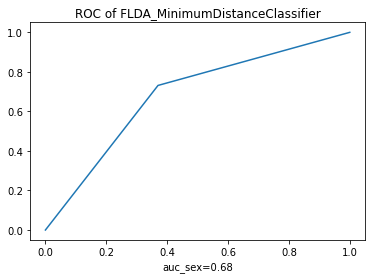

In [10]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

print('性别分类上的F1评分：%.2f'%f1_score(ytest[:,1],sex_predict,average='weighted'))
print('年龄分类上的F1评分：%.2f'%f1_score(ytest[:,2],age_predict,average='weighted'))
print('种族分类上的F1评分：%.2f'%f1_score(ytest[:,3],race_predict,average='weighted'))
print('表情分类上的F1评分：%.2f'%f1_score(ytest[:,4],face_predict,average='weighted'))


#性别分类是二分类问题，可以用ROC和AUC评价
#传入roc_curve的标签要求是数值，这里先用LabelEncoder数值化
ytest_sex = np.array(ytest[:,1])
lbe1 = preprocessing.LabelEncoder()
lbe1 = lbe1.fit(sex[:,0])
_sex_predict = lbe1.transform(sex_predict)
_ytest_sex = lbe1.transform(ytest_sex)
fpr1,tpr1,thresholds1 = roc_curve(_ytest_sex,_sex_predict)
aucscore = roc_auc_score(_ytest_sex,_sex_predict)
fig,ax=plt.subplots()
ax.plot(fpr1,tpr1)
ax.set_xlabel("auc_sex=%.2f"%aucscore)
ax.set_title("ROC of FLDA_MinimumDistanceClassifier")
plt.show()

## 四、补充分析

最小距离分类器不考虑类别内部的方差，也不考虑类别之间的协方差，因此最小距离分类器精度不高，这就对待分类的类别内部的方差和类别之间的协方差有一定要求。  
前面FLDA特征提取时，表情分类的图像数据的特征向量降至2维，可以用散点图表示出各个类别的分布情况。对于年龄分类和种族分类，用FLDA重新训练降至2维，再画出散点图。

1. 年龄分类的训练数据分布情况：

(244, 2) (261, 2) (1437, 2) (54, 2)


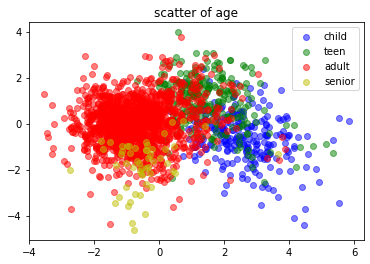

In [11]:
import matplotlib.pyplot as plt

lda_age1 = LDA(n_components=2) #降至可用平面表示的二维
lda_age1.fit(xtrain,ytrain[:,2])
#将训练好的LDA模型对数据进行特征提取
xtrain_age1 = lda_age1.transform(xtrain)
#将图像的训练数据中各个类别的数据分开储存
child = np.array([[0,0]])
teen = np.array([[0,0]])
adult = np.array([[0,0]])
senior = np.array([[0,0]])
for i in range(1996):
    _age = ytrain[i,2]
    if _age == 'child':
        child = np.append(child,[xtrain_age1[i]],axis=0)
    elif _age == 'teen':
        teen = np.append(teen,[xtrain_age1[i]],axis=0)
    elif _age == 'adult':
        adult = np.append(adult,[xtrain_age1[i]],axis=0)
    elif _age == 'senior':
        senior = np.append(senior,[xtrain_age1[i]],axis=0)
child = np.delete(child,0,axis=0)
teen = np.delete(teen,0,axis=0)
adult = np.delete(adult,0,axis=0)
senior = np.delete(senior,0,axis=0)
print(child.shape,teen.shape,adult.shape,senior.shape)
#绘制散点图
plt.scatter(child[:,0],child[:,1],c='b',alpha=0.5,label='child')
plt.scatter(teen[:,0],teen[:,1],c='g',alpha=0.5,label='teen')
plt.scatter(adult[:,0],adult[:,1],c='r',alpha=0.5,label='adult')
plt.scatter(senior[:,0],senior[:,1],c='y',alpha=0.5,label='senior')
plt.title('scatter of age')
plt.legend()
plt.show()

3. 种族分类的训练数据分布情况：

(1839, 2) (64, 2) (26, 2) (55, 2) (12, 2)


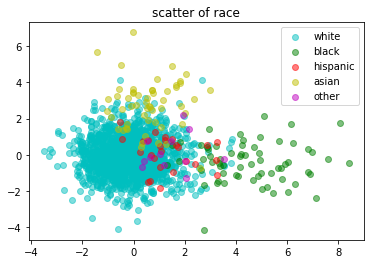

In [16]:
lda_race1 = LDA(n_components=2) #降至可用平面表示的二维
lda_race1.fit(xtrain,ytrain[:,3])
#将训练好的LDA模型对数据进行特征提取
xtrain_race1 = lda_race1.transform(xtrain)
#将图像的训练数据中各个类别的数据分开储存
white = np.array([[0,0]])
black = np.array([[0,0]])
asian = np.array([[0,0]])
hispanic = np.array([[0,0]])
other = np.array([[0,0]])
for i in range(1996):
    _race = ytrain[i,3]
    if _race == 'white':
        white = np.append(white,[xtrain_race1[i]],axis=0)
    elif _race == 'black':
        black = np.append(black,[xtrain_race1[i]],axis=0)
    elif _race == 'asian':
        asian = np.append(asian,[xtrain_race1[i]],axis=0)
    elif _race == 'hispanic':
        hispanic = np.append(hispanic,[xtrain_race1[i]],axis=0)
    elif _race == 'other':
        other = np.append(other,[xtrain_race1[i]],axis=0)
white = np.delete(white,0,axis=0)
black = np.delete(black,0,axis=0)
asian = np.delete(asian,0,axis=0)
hispanic = np.delete(hispanic,0,axis=0)
other = np.delete(other,0,axis=0)
print(white.shape,black.shape,hispanic.shape,asian.shape,other.shape)
#绘制散点图
plt.scatter(white[:,0],white[:,1],c='c',alpha=0.5,label='white')
plt.scatter(black[:,0],black[:,1],c='g',alpha=0.5,label='black')
plt.scatter(hispanic[:,0],hispanic[:,1],c='r',alpha=0.5,label='hispanic')
plt.scatter(asian[:,0],asian[:,1],c='y',alpha=0.5,label='asian')
plt.scatter(other[:,0],other[:,1],c='m',alpha=0.5,label='other')
plt.title('scatter of race')
plt.legend()
plt.show()

4. 表情分类的训练数据分布情况：

(919, 2) (1040, 2) (37, 2)


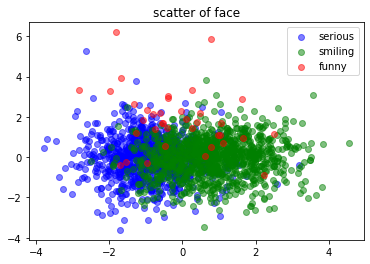

In [12]:
#将图像的训练数据中各个类别的数据分开储存
serious = np.array([[0,0]])
smiling = np.array([[0,0]])
funny = np.array([[0,0]])
for i in range(1996):
    _face = ytrain[i,4]
    if _face == 'serious':
        serious = np.append(serious,[xtrain_face[i]],axis=0)
    elif _face == 'smiling':
        smiling = np.append(smiling,[xtrain_face[i]],axis=0)
    elif _face == 'funny':
        funny = np.append(funny,[xtrain_face[i]],axis=0)
serious = np.delete(serious,0,axis=0)
smiling = np.delete(smiling,0,axis=0)
funny = np.delete(funny,0,axis=0)
print(serious.shape,smiling.shape,funny.shape)
#绘制散点图
plt.scatter(serious[:,0],serious[:,1],c='b',alpha=0.5,label='serious')
plt.scatter(smiling[:,0],smiling[:,1],c='g',alpha=0.5,label='smiling')
plt.scatter(funny[:,0],funny[:,1],c='r',alpha=0.5,label='funny')
plt.title('scatter of face')
plt.legend()
plt.show()